In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy as scp
from tqdm import tqdm

%matplotlib widget

In [12]:
HEADER = ['F3', 'Fz', 'F4', 'FC3', 'FCz', 'FC4', 'C3', 'Cz', 'C4', 'CP3', 'CPz', 'CP4', 'P3', 'Pz', 'P4', 'Oz', 'Photoresistor']
tsv = pd.read_csv("../data/S1_21_tomas_3.tsv", sep="\t", names=HEADER)

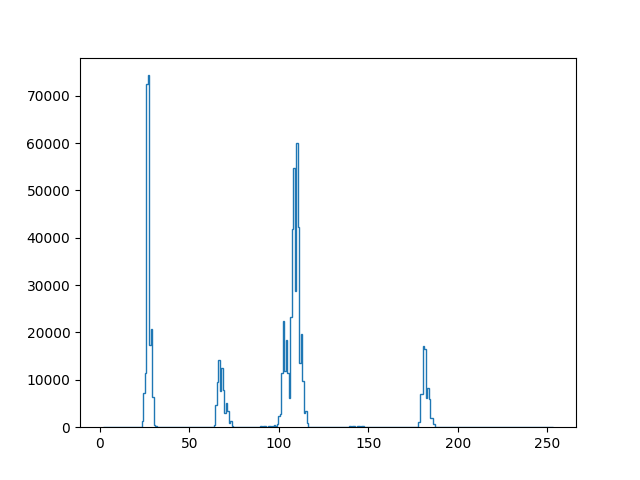

In [13]:
pr = tsv["Photoresistor"].to_numpy()
tsv["Photoresistor"].to_csv("../data/photoresistor.csv")

bins, count = np.histogram(pr, bins=300)

plt.figure()
plt.stairs(bins, count)
plt.show()

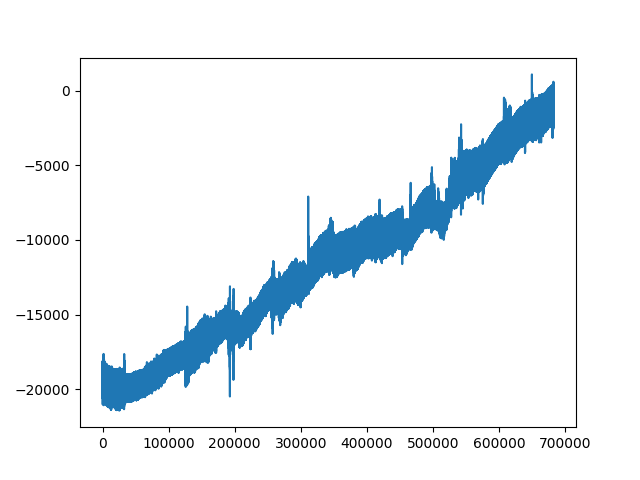

In [14]:
# Through graphical analysis
ACTION_1_MIN = 48
ACTION_1_MAX = 82
ACTION_2_MIN = 164
ACTION_2_MAX = 210

"""
Reading the csv generated by the protocol program, we know that:
- The first action was the right hand
- The right hand option is paired with up (both hands)
- The first reponse was HIGH (so ACTION_2)
- Each action was recorded (15 samples per set) * 5 (set count) * 2 (action + imagined) = 150

Also, through value analysis, values before 5300 and after 687900 shouldn't be used, since they are after the experiment end.

Useful numbers to know:

- Expected n of high samples = low samples = 150 * 2 = 300
- Expected n of rests = n high samples + n low samples = 600
- Expected n of pauses = n sets + 1 = 7
"""

data = tsv.to_numpy()[5300:687900, :].T
plt.figure()
plt.plot(data[15])

<h1>Pre-processing</h1>

In [15]:
fs = 125
nyq = fs/2
fl = 0.5
fh = 45
winlen = 501

filt = scp.signal.firwin(501, [fl, fh], pass_zero = False, fs = fs)

w, h = scp.signal.freqz(filt)



filtered = []
# Usámos um filtro FIR, com group delay consistente e conhecido. Ao usar filtfilt, o filtro é aplicado forward e backward. 
# Assim, o group delay é eliminado e a ordem do filtro é duplicada

# for dat in data:
#     print(i)
#     filtered.append(scp.signal.filtfilt(filt, [1], dat))
#     i += 1


for i in tqdm(range(0,len(data)-1)):
    filtered.append(scp.signal.filtfilt(filt, [1], data[i]))

# filtered = scp.signal.filtfilt(filt, [1], data[0])


  6%|▋         | 1/16 [00:35<08:59, 36.00s/it]

0


 12%|█▎        | 2/16 [01:14<08:41, 37.25s/it]

1


 19%|█▉        | 3/16 [01:51<08:03, 37.17s/it]

2


 25%|██▌       | 4/16 [02:42<08:35, 42.93s/it]

3


 31%|███▏      | 5/16 [03:29<08:07, 44.33s/it]

4


 38%|███▊      | 6/16 [04:12<07:17, 43.80s/it]

5


 44%|████▍     | 7/16 [04:38<05:42, 38.05s/it]

6


 50%|█████     | 8/16 [05:07<04:40, 35.09s/it]

7


 56%|█████▋    | 9/16 [05:36<03:51, 33.04s/it]

8


 62%|██████▎   | 10/16 [06:16<03:32, 35.37s/it]

9


 69%|██████▉   | 11/16 [06:53<02:59, 35.81s/it]

10


 75%|███████▌  | 12/16 [07:33<02:28, 37.13s/it]

11


 81%|████████▏ | 13/16 [08:09<01:50, 36.74s/it]

12


 88%|████████▊ | 14/16 [08:35<01:07, 33.61s/it]

13


 94%|█████████▍| 15/16 [09:00<00:30, 30.79s/it]

14


100%|██████████| 16/16 [09:25<00:00, 35.33s/it]

15


In [27]:
np.shape(data[0])

(682600,)

Text(0.5, 0, 'Freq (Hz)')

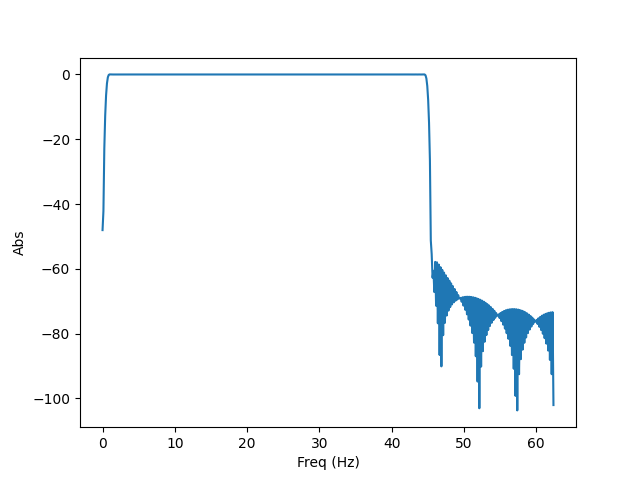

In [16]:
plt.close('all')
plt.figure()
plt.plot(nyq * w/(np.pi), 20 * np.log10(abs(h)))
plt.ylabel("Abs")
plt.xlabel("Freq (Hz)")



In [19]:
print(np.shape(filtered))

(16, 682600)


[-5.56979262e-01 -1.37422124e+03 -6.79640915e+02 ...  6.56091527e+01
  1.30653923e+02 -1.12042687e-01]
[-5.51568170e-01 -1.37898096e+03 -6.84021199e+02 ... -7.84104734e+01
 -9.31307467e+01 -3.32932111e-01]
[-3.90203921e-01 -1.37399262e+03 -6.82151470e+02 ... -8.70734326e+01
 -8.19948645e+01 -1.03194388e-01]
[-3.07375735e-01 -1.37182084e+03 -6.77698733e+02 ... -2.73985556e+01
 -5.71772928e+01 -5.87375850e-02]
[-5.28149791e-01 -1.37253278e+03 -6.77346882e+02 ... -6.80021208e+01
 -7.53289361e+01 -3.21926528e-01]
[-5.49366352e-01 -1.38001477e+03 -6.83373350e+02 ... -8.54007035e+01
 -7.08607121e+01 -4.07571948e-01]
[-5.41722933e-01 -1.37539116e+03 -6.78855321e+02 ... -4.58140211e+01
 -5.76507541e+01 -3.52501604e-01]
[-5.46818429e-01 -1.38128898e+03 -6.81964747e+02 ... -6.10234758e+01
 -6.65360865e+01 -3.48178621e-01]
[-5.36957062e-01 -1.21834413e+03 -6.05483571e+02 ...  1.20026633e+03
  2.25153784e+03 -3.76414419e-01]
[-5.30228876e-01 -1.18266952e+03 -5.90721164e+02 ...  1.21361769e+03
  2.

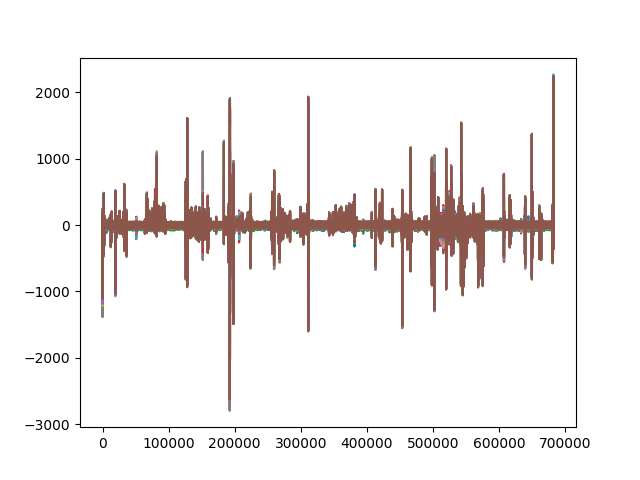

In [22]:
x = np.arange(np.shape(filtered)[1])

plt.figure()
for sig in filtered:
    print(sig)
    plt.plot(x, sig)

In [33]:
from fft import fft

X = fft(filtered[0])
plt.figure()


Exception: Length of the signal must be a power of two.

<h1>Criação de um banco de filtros para utilização com CSP (FBCSP) </h1>

In [58]:
bands = []
f1 = 4
f2 = 8
max = 40

while f2 <= max:
    bands.append([f1, f2])
    f1 += 2
    f2 += 2
print(bands)

fb = []
for i in range(len(bands)):
    filt = scp.signal.firwin(501, [bands[i][0], bands[i][1]], pass_zero = False, fs = fs)
    fb.append(filt)

# fb é uma lista em que cada index tem o filtro para essa banda
print(len(fb))



[[4, 8], [6, 10], [8, 12], [10, 14], [12, 16], [14, 18], [16, 20], [18, 22], [20, 24], [22, 26], [24, 28], [26, 30], [28, 32], [30, 34], [32, 36], [34, 38], [36, 40]]
17


<h1> Real-time <b>(adaptar)</h1>

In [ ]:
m = model 

feature_vector = []

n_trials = np.shape(test_data)[2] # TODO: adaptar ao actual shape

for count in range(n_trials):

    pred = m.predict(feature_vector[count])
    print("--------------------")
    c = np.argmax(pred)
    print("Trial: ", count)
    print("Previsão:         ", c)
    print("Label verdadeira: ", int(labels[count]))

    time.sleep(4)

NameError: name 'model' is not defined